In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Morphological Edge Detector

Morphological operations are one of the simplest operations that you can apply on images. Though it is simple its widely used in various application. In this part of the assignment we will eplore one of the most simplest method to draw edges in an image using morphological transform. 

Steps to find edges using Morphology:
* Consider the original image to be $f$
* Now, dilate the image $f$ and consider $d = dilate(f)$
* Calculate $e = d - f$
* Apply a suitable threshold (Hint: Any adaptive thresholding may be easy and usefull)

PS: You are allowed to use modules available [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) and [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

Note that your main task is to find a suitable structuring element i.e. kernel, also you may need to apply any suitable filter before runnning your edge detection algorithm.

### Additional Task
Try to get the edges using inbuilt [canny edge detector in openCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html). What do you observe? 

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-w__jkhku
  Created wheel for ee604-plugins: filename=ee604_plugins-0.4.2-cp36-none-any.whl size=2457 sha256=78b2891fdb2627d77a28b46cf8acf8b6e8c9dce1453d221ec20083f2b4175f70
  Stored in directory: /tmp/pip-ephem-wheel-cache-mze4i_wk/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-w__jkhku


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=4, task_no=3) # download data for this assignment

Download Complete!


In [4]:
def edge_detection(img):
    '''
    This function should return an image showing edges in the the given input image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + edge_morph - image having edges detected using morphology
    + edge_canny - image having edges detected using canny
    
    Allowed modules:
    + Any relevant module in openCV
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    edge_canny = cv2.Canny(img, 100, 200)

    kernel = np.ones((7,7), np.uint8)

    dil = cv2.dilate(img, kernel, 1)
    _, edge_morph = cv2.threshold((dil - img), 50, 255, cv2.THRESH_BINARY)
    
    #############################
    # End your code here ########
    #############################    
    
    return edge_morph, edge_canny

### Observations

In [5]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the morphology and canny based edge detectors on quality of detection, 
# difficulty in parmatere tuning, etc. 

tajmahal_pixabay = cv2.imread("data/tajmahal_pixabay.jpg", 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)

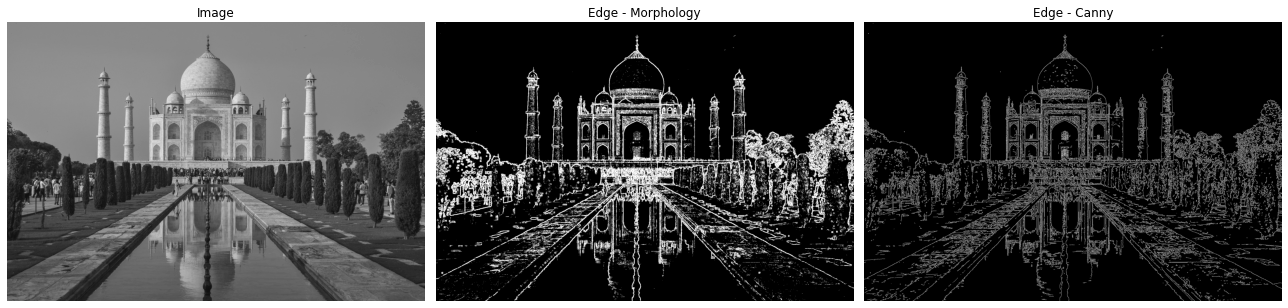

In [6]:
# Do not change codes inside this cell
edge_morph, edge_canny = edge_detection(tajmahal_pixabay)

fig = plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, tajmahal_pixabay, "Image")
plot_frame(1, 3, 1, edge_morph, "Edge - Morphology")
plot_frame(1, 3, 2, edge_canny, "Edge - Canny")
fig.tight_layout()
plt.show()

In [7]:
your_observation = """
Morphology Taj Mahal is a bit brighter than canny and almost similar edges are detected in both. 
Morphology also has fewer white isolated pixels due to dilation
"""

print(your_observation)


Morphology Taj Mahal is a bit brighter than canny and almost similar edges are detected in both. 
Morphology also has fewer white isolated pixels due to dilation

